d) Build the code in part b into a function and run for multiple gammas, we could see that the higher the gamma is, the level of persistence increases. This is because with higher gamma, shocks to the process will have a more long-lasting effect, resulting in smoother line over longer period. On the other hand, lower gammas allow shocks to dissipate rapidly. This results in a higher level of volatility in the simulated $y_t$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def build_markov_chain_rouwenhorst(N=7, gamma=0.85, sigma=0.1):
  z_max = sigma * np.sqrt((N - 1) / (1 - gamma ** 2))
  z = np.linspace(-z_max, z_max, N)
  p = q = (1 + gamma) / 2
  Pi = np.array([[p, 1 - p], [1 - p, p]])
  Pi_new = np.zeros((N, N))
  for n in range(3, N + 1):
    Pi_new = np.zeros((n, n))
    Pi_new[:-1, :-1] += p * Pi
    Pi_new[:-1, 1:] += (1 - p) * Pi
    Pi_new[1:, :-1] += (1 - p) * Pi
    Pi_new[1:, 1:] += p * Pi
    Pi_new[1:-1, :] /= 2
    Pi = Pi_new
  return z, Pi

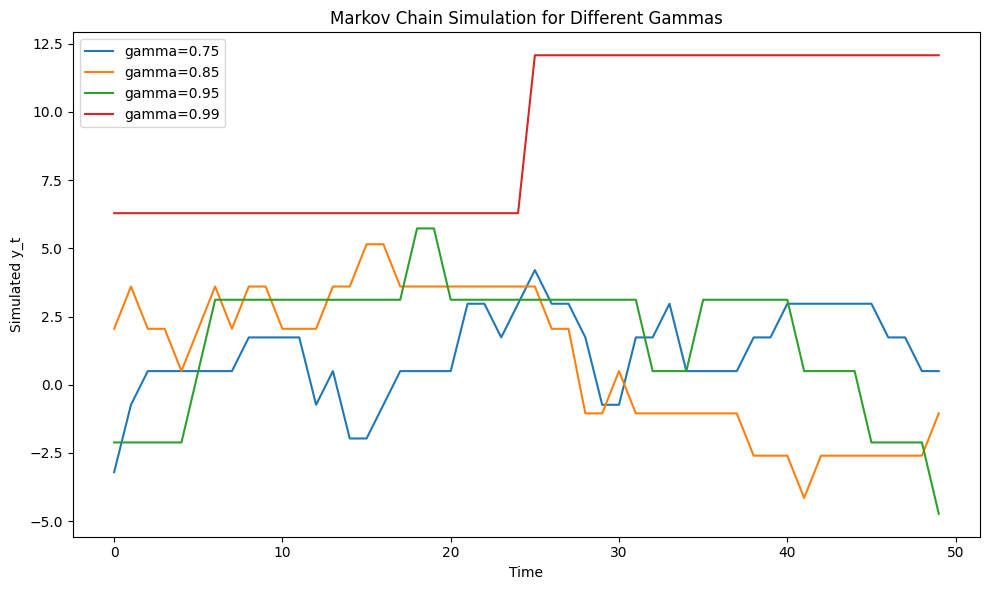

In [ ]:
np.random.seed(2025)
def simulate_markov_chain(z_grid, Pi, T=50, init_dist=None):
    N = len(z_grid)

    if init_dist is None:
        # Uniform initial distribution
        init_dist = np.ones(N) / N

    # Draw initial state index according to init_dist
    initial_state = np.random.choice(np.arange(N), p=init_dist)

    states = np.zeros(T, dtype=int)
    states[0] = initial_state

    for t in range(1, T):
        # Transition from states[t-1] with row Pi[states[t-1], :]
        current_state = states[t-1]
        next_state = np.random.choice(np.arange(N), p=Pi[current_state, :])
        states[t] = next_state

    # Map state indices to actual z-values
    z_vals = z_grid[states]
    return states, z_vals
if __name__ == "__main__":
    gammas = [0.75, 0.85, 0.95, 0.99]
    sigma = 1.0
    N = 7
    T = 50

    plt.figure(figsize=(10, 6))

    for i, gamma in enumerate(gammas):
        z_grid, Pi = build_markov_chain_rouwenhorst(N=N, gamma=gamma, sigma=sigma)
        states, z_vals = simulate_markov_chain(z_grid, Pi, T=T)
        y_vals = 0.5 + z_vals

        # Plot
        plt.plot(y_vals, label=f"gamma={gamma}")

    plt.title("Markov Chain Simulation for Different Gammas")
    plt.xlabel("Time")
    plt.ylabel("Simulated y_t")
    plt.legend()
    plt.tight_layout()
    plt.show()